In [1]:
import numpy as np
import h5py

#f = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/"
#              +"processed/comparison/output/nexus,peaks,OSNK,0,10"
#              +",1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE"
#              +",FALSE,1/deeplift.imp_score.h5", "r")
f = h5py.File("deeplift.imp_score.h5","r")
nanog_mask = np.array(f['metadata']['interval_from_task'][:]=='Nanog')
nanog_profile_wn_hypimp = np.array(f["hyp_imp/Nanog/profile/wn"][:])[nanog_mask]
onehot_seq = np.array(f["inputs/seq"][:])[nanog_mask]
nanog_profile_wn_contribs = nanog_profile_wn_hypimp*onehot_seq

In [2]:
import modisco
FRAC_SEQS_TO_USE = 0.02
NUM_SEQS_TO_USE = int(FRAC_SEQS_TO_USE*len(nanog_profile_wn_contribs))
print("num seqs to use:", NUM_SEQS_TO_USE)

task_names=["Nanog_profile_wn"]
contrib_scores={'Nanog_profile_wn':
                 nanog_profile_wn_contribs[:NUM_SEQS_TO_USE]}
hypothetical_contribs={'Nanog_profile_wn':
                       nanog_profile_wn_hypimp[:NUM_SEQS_TO_USE]}
one_hot=onehot_seq[:NUM_SEQS_TO_USE]

TF-MoDISco is using the TensorFlow backend.
/users/avanti/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/users/avanti/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/users/avanti/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/users/avanti/anaconda3/lib/python3

num seqs to use: 1104


In [3]:
np.save("nanog_profile_wn_contribs_fewerseqlets.npy", nanog_profile_wn_contribs[:NUM_SEQS_TO_USE])
np.save("nanog_profile_wn_hypimp_fewerseqlets.npy", nanog_profile_wn_hypimp[:NUM_SEQS_TO_USE])
np.save("onehot_seq_fewerseqlets.npy", onehot_seq[:NUM_SEQS_TO_USE])

/mnt/lab_data2/avanti/tfmodisco
commit 7b8febe0474f86be58181ce8b524db8d579ef018 (HEAD -> clustermergindev2, origin/clustermergindev2)
Author: Avanti Shrikumar <avanti.shrikumar@gmail.com>
Date:   Wed Nov 11 01:20:56 2020 -0800

    further speedups
/mnt/lab_data2/avanti/tfmodisco_bio_experiments/bpnet/trial1
MEMORY 3.011002368
On task Nanog_profile_wn
Computing windowed sums on original
Generating null dist
peak(mu)= 0.003840833756548818
Computing threshold
Thresholds from null dist were -0.0166471004486084  and  0.10157325863838196
Final raw thresholds are -0.0166471004486084  and  0.10157325863838196
Final transformed thresholds are -0.519914596273292  and  0.8223334442472642


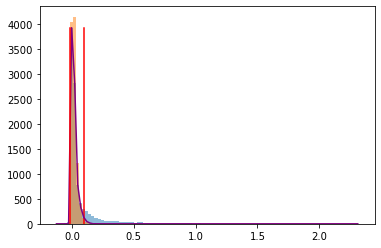

Got 9356 coords
After resolving overlaps, got 9356 seqlets
Across all tasks, the weakest transformed threshold used was: 0.519814596273292
MEMORY 3.111776256
9356 identified in total
Reducing weak_threshold_for_counting_sign to match weakest_transformed_thresh, from 0.8 to 0.519814596273292
1 activity patterns with support >= 2000 out of 2 possible patterns
Metacluster sizes:  [8719]
Idx to activities:  {0: '1'}
MEMORY 3.112534016
On metacluster 0
Metacluster size 8719
Relevant tasks:  ('Nanog_profile_wn',)
Relevant signs:  (1,)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 8719
(Round 1) Computing coarse affmat
MEMORY 3.112554496
Beginning embedding computation


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    4.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    8.1s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   14.3s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:   22.3s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:   32.3s
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:   44.7s
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:   59.6s
[Parallel(n_jobs=10)]: Done 3180 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done 4030 tasks      | elapsed:  1.5min
[Parallel(n_jobs=10)]: Done 4980 tasks      | elapsed:  1.8min
[Parallel(n_jobs=10)]: Done 6030 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done 7180 tasks      | elapsed:  2.6min
[Parallel(n_jobs=10)]: Done 8430 tasks      | elapsed:  3.0min
[Parallel(n_jobs=10)]: Done 8719 out of 8719 | elapsed:  3.2min finished
[Parallel(n_jobs=10)]: Using backen

Constructing csr matrix...
csr matrix made in 12.94959282875061 s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8719 out of 8719 | elapsed:  2.7min finished


Constructing csr matrix...
csr matrix made in 12.955052137374878 s
Finished embedding computation in 757.11 s
Starting affinity matrix computations
Batching in slices of size 500


100%|██████████| 18/18 [01:19<00:00,  4.42s/it]


Batching in slices of size 500


100%|██████████| 18/18 [01:18<00:00,  4.36s/it]


Finished affinity matrix computations in 161.47 s
(Round 1) Compute nearest neighbors from coarse affmat
MEMORY 8.095776768
Computed nearest neighbors in 7.01 s
MEMORY 8.095776768
(Round 1) Computing affinity matrix on nearest neighbors
MEMORY 8.095776768
Launching nearest neighbors affmat calculation job
MEMORY 8.095780864
Parallel runs completed
MEMORY 8.034615296
Job completed in: 71.14 s
MEMORY 8.58191872
Launching nearest neighbors affmat calculation job
MEMORY 8.58191872
Parallel runs completed
MEMORY 8.61149184
Job completed in: 71.31 s
MEMORY 9.219612672
(Round 1) Computed affinity matrix on nearest neighbors in 145.53 s
MEMORY 8.6115328
Filtered down to 6862 of 8719
(Round 1) Retained 6862 rows out of 8719 after filtering
MEMORY 8.611794944
(Round 1) Computing density adapted affmat
MEMORY 7.772151808
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 6862 samples in 0.080s...
[t-SNE] Computed neighbors for 6862 samples in 0.483s...
[t-SNE] Computed conditional probabil

  0%|          | 0/50 [00:00<?, ?it/s]

Quality: 0.6951482852134592


  4%|▍         | 2/50 [00:06<02:37,  3.27s/it]

Quality: 0.6955151158481995


  6%|▌         | 3/50 [00:10<02:51,  3.65s/it]

Quality: 0.6955829561489105


 14%|█▍        | 7/50 [00:29<03:04,  4.30s/it]

Quality: 0.6963400361673426


100%|██████████| 50/50 [03:58<00:00,  4.77s/it]

Got 23 clusters after round 1
Counts:
{14: 163, 4: 554, 9: 283, 13: 220, 7: 410, 8: 308, 11: 247, 1: 730, 0: 813, 10: 275, 6: 505, 3: 555, 15: 152, 16: 127, 2: 579, 19: 13, 17: 109, 5: 522, 20: 12, 12: 244, 22: 6, 18: 24, 21: 11}
MEMORY 7.395844096
(Round 1) Aggregating seqlets in each cluster
MEMORY 7.395844096
Aggregating for cluster 0 with 813 seqlets
MEMORY 7.395844096


Trimming eliminated 0 seqlets out of 813
Skipped 1 seqlets
Removed 27 duplicate seqlets
Removed 2 duplicate seqlets
Aggregating for cluster 1 with 730 seqlets
MEMORY 7.395856384
Trimming eliminated 0 seqlets out of 730
Skipped 1 seqlets
Removed 20 duplicate seqlets
Aggregating for cluster 2 with 579 seqlets
MEMORY 7.39559424
Trimming eliminated 0 seqlets out of 579
Removed 11 duplicate seqlets
Aggregating for cluster 3 with 555 seqlets
MEMORY 7.39559424
Trimming eliminated 0 seqlets out of 555
Removed 4 duplicate seqlets
Aggregating for cluster 4 with 554 seqlets
MEMORY 7.39559424
Trimming eliminated 0 seqlets out of 554
Removed 3 duplicate seqlets
Aggregating for cluster 5 with 522 seqlets
MEMORY 7.39559424
Trimming eliminated 5 seqlets out of 522
Removed 5 duplicate seqlets
Aggregating for cluster 6 with 505 seqlets
MEMORY 7.39559424
Trimming eliminated 0 seqlets out of 505
Removed 19 duplicate seqlets
Aggregating for cluster 7 with 410 seqlets
MEMORY 7.39559424
Trimming eliminated 0

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    5.5s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    8.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   12.5s
[Parallel(n_jobs=10)]: Done 980 tasks      | elapsed:   20.7s
[Parallel(n_jobs=10)]: Done 1880 tasks      | elapsed:   31.6s
[Parallel(n_jobs=10)]: Done 2980 tasks      | elapsed:   45.9s
[Parallel(n_jobs=10)]: Done 4280 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 5780 tasks      | elapsed:  1.4min
[Parallel(n_jobs=10)]: Done 6673 out of 6692 | elapsed:  1.5min remaining:    0.3s
[Parallel(n_jobs=10)]: Done 6692 out of 6692 | elapsed:  1.5min finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.9s
[Parallel(n_jobs=10)]: Done 340 tasks      | elapsed:    7.4s
[Parallel(n_jobs=10)]: Done 840 tasks      | elapsed:   14.9s
[Par

Constructing csr matrix...
csr matrix made in 6.288353204727173 s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6692 out of 6692 | elapsed:  1.3min finished


Constructing csr matrix...
csr matrix made in 5.961185693740845 s
Finished embedding computation in 362.13 s
Starting affinity matrix computations
Batching in slices of size 500


100%|██████████| 14/14 [00:30<00:00,  2.16s/it]


Batching in slices of size 500


100%|██████████| 14/14 [00:29<00:00,  2.07s/it]


Finished affinity matrix computations in 61.13 s
(Round 2) Compute nearest neighbors from coarse affmat
MEMORY 7.72149248
Computed nearest neighbors in 4.38 s
MEMORY 7.72018176
(Round 2) Computing affinity matrix on nearest neighbors
MEMORY 7.72018176
Launching nearest neighbors affmat calculation job
MEMORY 7.72018176
Parallel runs completed
MEMORY 7.730184192
Job completed in: 77.2 s
MEMORY 7.988293632
Launching nearest neighbors affmat calculation job
MEMORY 7.988293632
Parallel runs completed
MEMORY 8.003936256
Job completed in: 76.89 s
MEMORY 8.362184704
(Round 2) Computed affinity matrix on nearest neighbors in 156.33 s
MEMORY 8.003944448
Not applying filtering for rounds above first round
MEMORY 8.003944448
(Round 2) Computing density adapted affmat
MEMORY 7.645679616
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 6692 samples in 0.075s...
[t-SNE] Computed neighbors for 6692 samples in 0.449s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6692
[t-SNE]

  0%|          | 0/50 [00:00<?, ?it/s]

Quality: 0.6874693563873155


  4%|▍         | 2/50 [00:07<03:17,  4.11s/it]

Quality: 0.688261494710417


  6%|▌         | 3/50 [00:12<03:20,  4.27s/it]

Quality: 0.6882986076313621


 10%|█         | 5/50 [00:21<03:14,  4.33s/it]

Quality: 0.6883395788609108


 12%|█▏        | 6/50 [00:26<03:30,  4.79s/it]

Quality: 0.6884912950475355


 14%|█▍        | 7/50 [00:32<03:32,  4.95s/it]

Quality: 0.6887325307101226


 52%|█████▏    | 26/50 [02:13<02:02,  5.12s/it]

Quality: 0.6890034264550987


100%|██████████| 50/50 [04:05<00:00,  4.91s/it]

Got 26 clusters after round 2
Counts:
{0: 1008, 15: 108, 11: 255, 6: 371, 3: 559, 8: 296, 9: 289, 12: 252, 1: 708, 2: 610, 19: 37, 10: 259, 17: 52, 7: 365, 22: 10, 13: 241, 16: 94, 4: 517, 21: 19, 25: 2, 5: 426, 14: 140, 20: 26, 18: 43, 24: 2, 23: 3}
MEMORY 7.287156736
(Round 2) Aggregating seqlets in each cluster
MEMORY 7.286894592
Aggregating for cluster 0 with 1008 seqlets
MEMORY 7.286894592


Trimming eliminated 0 seqlets out of 1008
Removed 95 duplicate seqlets
Aggregating for cluster 1 with 708 seqlets
MEMORY 7.286894592
Trimming eliminated 0 seqlets out of 708
Removed 65 duplicate seqlets
Aggregating for cluster 2 with 610 seqlets
MEMORY 7.286894592
Trimming eliminated 0 seqlets out of 610
Removed 97 duplicate seqlets
Aggregating for cluster 3 with 559 seqlets
MEMORY 7.286894592
Trimming eliminated 0 seqlets out of 559
Removed 70 duplicate seqlets
Aggregating for cluster 4 with 517 seqlets
MEMORY 7.286894592
Trimming eliminated 0 seqlets out of 517
Removed 47 duplicate seqlets
Aggregating for cluster 5 with 426 seqlets
MEMORY 7.286894592
Trimming eliminated 0 seqlets out of 426
Removed 21 duplicate seqlets
Aggregating for cluster 6 with 371 seqlets
MEMORY 7.286894592
Trimming eliminated 0 seqlets out of 371
Removed 60 duplicate seqlets
Aggregating for cluster 7 with 365 seqlets
MEMORY 7.286894592
Trimming eliminated 0 seqlets out of 365
Skipped 1 seqlets
Removed 48 dupli

Similarity is 0.6330159; is_dissimilar is True
Got 4 subclusters
Inspecting for spurious merging
Wrote graph to binary file in 0.09163475036621094 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00779223
Louvain completed 21 runs in 6.418339252471924 seconds
Similarity is 0.85547394; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.08720588684082031 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = -0.000392897
After 2 runs, maximum modularity is Q = -0.000367387
After 3 runs, maximum modularity is Q = 0.00388567
Louvain completed 23 runs in 7.315288782119751 seconds
Similarity is 0.82440853; is_dissimilar is False
Inspecting for spurious merging
Wrote graph to binary file in 0.09656405448913574 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.00735352
After 2 runs, maximum modularity is Q = 0.0075461
After 9 runs, maximum modula

Time taken: 0.6033375263214111
Computing sim between patterns 2 and 5
Time taken: 0.5653624534606934
Computing sim between patterns 2 and 6
Time taken: 0.5600550174713135
Computing sim between patterns 2 and 7
Time taken: 0.5879695415496826
Computing sim between patterns 2 and 8
Time taken: 0.5406956672668457
Computing sim between patterns 2 and 9
Time taken: 0.5618619918823242
Computing sim between patterns 2 and 10
Time taken: 0.5002591609954834
Computing sim between patterns 2 and 11
Time taken: 0.5060577392578125
Computing sim between patterns 2 and 12
Time taken: 0.6222951412200928
Computing sim between patterns 2 and 13
Time taken: 0.4862639904022217
Computing sim between patterns 2 and 14
Time taken: 0.5167922973632812
Computing sim between patterns 2 and 15
Time taken: 0.5187587738037109
Computing sim between patterns 2 and 16
Time taken: 0.48281264305114746
Computing sim between patterns 2 and 17
Time taken: 0.8979694843292236
Computing sim between patterns 2 and 18
Time taken

Time taken: 0.4539213180541992
Computing sim between patterns 5 and 25
Time taken: 0.45131945610046387
Computing sim between patterns 5 and 26
Time taken: 0.48613595962524414
Computing sim between patterns 5 and 27
Time taken: 0.4802248477935791
Computing sim between patterns 5 and 28
Time taken: 0.472736120223999
Computing sim between patterns 5 and 29
Time taken: 0.4640319347381592
Computing sim between patterns 5 and 30
Time taken: 0.49123477935791016
Computing sim between patterns 5 and 31
Time taken: 0.4327254295349121
Computing sim between patterns 5 and 32
Time taken: 0.43706250190734863
Computing sim between patterns 6 and 0
Time taken: 0.5737202167510986
Computing sim between patterns 6 and 1
Time taken: 0.5899324417114258
Computing sim between patterns 6 and 2
Time taken: 0.5773296356201172
Computing sim between patterns 6 and 3
Time taken: 0.5878748893737793
Computing sim between patterns 6 and 4
Time taken: 0.5561678409576416
Computing sim between patterns 6 and 5
Time take

Time taken: 0.5342602729797363
Computing sim between patterns 9 and 13
Time taken: 0.6802637577056885
Computing sim between patterns 9 and 14
Time taken: 0.6075053215026855
Computing sim between patterns 9 and 15
Time taken: 0.641524076461792
Computing sim between patterns 9 and 16
Time taken: 0.5676395893096924
Computing sim between patterns 9 and 17
Time taken: 0.5497829914093018
Computing sim between patterns 9 and 18
Time taken: 0.5348489284515381
Computing sim between patterns 9 and 19
Time taken: 0.540414571762085
Computing sim between patterns 9 and 20
Time taken: 0.5422043800354004
Computing sim between patterns 9 and 21
Time taken: 0.5473968982696533
Computing sim between patterns 9 and 22
Time taken: 0.5611011981964111
Computing sim between patterns 9 and 23
Time taken: 0.5901844501495361
Computing sim between patterns 9 and 24
Time taken: 0.547196626663208
Computing sim between patterns 9 and 25
Time taken: 0.5298705101013184
Computing sim between patterns 9 and 26
Time take

Time taken: 0.16680097579956055
Computing sim between patterns 12 and 32
Time taken: 0.16303420066833496
Computing sim between patterns 13 and 0
Time taken: 0.11977338790893555
Computing sim between patterns 13 and 1
Time taken: 0.1193079948425293
Computing sim between patterns 13 and 2
Time taken: 0.12520623207092285
Computing sim between patterns 13 and 3
Time taken: 0.11722946166992188
Computing sim between patterns 13 and 4
Time taken: 0.11855792999267578
Computing sim between patterns 13 and 5
Time taken: 0.11960935592651367
Computing sim between patterns 13 and 6
Time taken: 0.11876583099365234
Computing sim between patterns 13 and 7
Time taken: 0.11916089057922363
Computing sim between patterns 13 and 8
Time taken: 0.11945796012878418
Computing sim between patterns 13 and 9
Time taken: 0.11581206321716309
Computing sim between patterns 13 and 10
Time taken: 0.0991215705871582
Computing sim between patterns 13 and 11
Time taken: 0.08951568603515625
Computing sim between patterns 

Time taken: 0.2906346321105957
Computing sim between patterns 16 and 18
Time taken: 0.29081249237060547
Computing sim between patterns 16 and 19
Time taken: 0.2982492446899414
Computing sim between patterns 16 and 20
Time taken: 0.32355809211730957
Computing sim between patterns 16 and 21
Time taken: 0.32044339179992676
Computing sim between patterns 16 and 22
Time taken: 0.35620594024658203
Computing sim between patterns 16 and 23
Time taken: 0.3477785587310791
Computing sim between patterns 16 and 24
Time taken: 0.38668060302734375
Computing sim between patterns 16 and 25
Time taken: 0.3672301769256592
Computing sim between patterns 16 and 26
Time taken: 0.34164881706237793
Computing sim between patterns 16 and 27
Time taken: 0.2879140377044678
Computing sim between patterns 16 and 28
Time taken: 0.3127474784851074
Computing sim between patterns 16 and 29
Time taken: 0.3105194568634033
Computing sim between patterns 16 and 30
Time taken: 0.30735015869140625
Computing sim between patt

Time taken: 0.35120248794555664
Computing sim between patterns 20 and 3
Time taken: 0.3281862735748291
Computing sim between patterns 20 and 4
Time taken: 0.360837459564209
Computing sim between patterns 20 and 5
Time taken: 0.7084066867828369
Computing sim between patterns 20 and 6
Time taken: 0.32340312004089355
Computing sim between patterns 20 and 7
Time taken: 0.3477437496185303
Computing sim between patterns 20 and 8
Time taken: 0.32631349563598633
Computing sim between patterns 20 and 9
Time taken: 0.3133585453033447
Computing sim between patterns 20 and 10
Time taken: 0.27950382232666016
Computing sim between patterns 20 and 11
Time taken: 0.27464914321899414
Computing sim between patterns 20 and 12
Time taken: 0.29613399505615234
Computing sim between patterns 20 and 13
Time taken: 0.30448079109191895
Computing sim between patterns 20 and 14
Time taken: 0.3464341163635254
Computing sim between patterns 20 and 15
Time taken: 0.3366689682006836
Computing sim between patterns 20 

Time taken: 0.33894872665405273
Computing sim between patterns 23 and 21
Time taken: 0.262620210647583
Computing sim between patterns 23 and 22
Time taken: 0.27434301376342773
Computing sim between patterns 23 and 24
Time taken: 0.25987768173217773
Computing sim between patterns 23 and 25
Time taken: 0.2759408950805664
Computing sim between patterns 23 and 26
Time taken: 0.26800060272216797
Computing sim between patterns 23 and 27
Time taken: 0.26746129989624023
Computing sim between patterns 23 and 28
Time taken: 0.2719554901123047
Computing sim between patterns 23 and 29
Time taken: 0.25726890563964844
Computing sim between patterns 23 and 30
Time taken: 0.25070714950561523
Computing sim between patterns 23 and 31
Time taken: 0.2487163543701172
Computing sim between patterns 23 and 32
Time taken: 0.27207040786743164
Computing sim between patterns 24 and 0
Time taken: 0.18204903602600098
Computing sim between patterns 24 and 1
Time taken: 0.17726659774780273
Computing sim between patt

Time taken: 0.1040339469909668
Computing sim between patterns 27 and 7
Time taken: 0.10640597343444824
Computing sim between patterns 27 and 8
Time taken: 0.10823416709899902
Computing sim between patterns 27 and 9
Time taken: 0.10681700706481934
Computing sim between patterns 27 and 10
Time taken: 0.09054303169250488
Computing sim between patterns 27 and 11
Time taken: 0.08522200584411621
Computing sim between patterns 27 and 12
Time taken: 0.08552336692810059
Computing sim between patterns 27 and 13
Time taken: 0.08081388473510742
Computing sim between patterns 27 and 14
Time taken: 0.10342597961425781
Computing sim between patterns 27 and 15
Time taken: 0.10471034049987793
Computing sim between patterns 27 and 16
Time taken: 0.09065890312194824
Computing sim between patterns 27 and 17
Time taken: 0.08192086219787598
Computing sim between patterns 27 and 18
Time taken: 0.08268475532531738
Computing sim between patterns 27 and 19
Time taken: 0.08271169662475586
Computing sim between p

Time taken: 0.015378236770629883
Computing sim between patterns 30 and 26
Time taken: 0.016509294509887695
Computing sim between patterns 30 and 27
Time taken: 0.014246463775634766
Computing sim between patterns 30 and 28
Time taken: 0.014479875564575195
Computing sim between patterns 30 and 29
Time taken: 0.014282703399658203
Computing sim between patterns 30 and 31
Time taken: 0.01434326171875
Computing sim between patterns 30 and 32
Time taken: 0.013668298721313477
Computing sim between patterns 31 and 0
Time taken: 0.014966011047363281
Computing sim between patterns 31 and 1
Time taken: 0.015205621719360352
Computing sim between patterns 31 and 2
Time taken: 0.01696324348449707
Computing sim between patterns 31 and 3
Time taken: 0.016400575637817383
Computing sim between patterns 31 and 4
Time taken: 0.01693868637084961
Computing sim between patterns 31 and 5
Time taken: 0.01738762855529785
Computing sim between patterns 31 and 6
Time taken: 0.015398263931274414
Computing sim betwe

Numbers for each pattern pre-subsample: [1733, 1104, 928, 470, 405, 242, 220, 193, 125, 90, 48, 41, 34, 30, 27, 26, 24, 19, 9, 3, 1, 1]
Numbers after subsampling: [300, 300, 300, 300, 300, 242, 220, 193, 125, 90, 48, 41, 34, 30, 27, 26, 24, 19, 9, 3, 1, 1]
Computing sim between patterns 0 and 1
Time taken: 0.5403766632080078
Computing sim between patterns 0 and 2
Time taken: 0.663794994354248
Computing sim between patterns 0 and 3
Time taken: 0.6262791156768799
Computing sim between patterns 0 and 4
Time taken: 0.5638370513916016
Computing sim between patterns 0 and 5
Time taken: 0.5507712364196777
Computing sim between patterns 0 and 6
Time taken: 0.5828371047973633
Computing sim between patterns 0 and 7
Time taken: 0.5380058288574219
Computing sim between patterns 0 and 8
Time taken: 0.5014514923095703
Computing sim between patterns 0 and 9
Time taken: 0.49830007553100586
Computing sim between patterns 0 and 10
Time taken: 0.5243964195251465
Computing sim between patterns 0 and 11
Ti

Time taken: 0.3937215805053711
Skipping prepopulated (6, 8)
Skipping prepopulated (6, 9)
Skipping prepopulated (6, 10)
Skipping prepopulated (6, 11)
Skipping prepopulated (6, 12)
Skipping prepopulated (6, 13)
Skipping prepopulated (6, 14)
Skipping prepopulated (6, 15)
Skipping prepopulated (6, 16)
Skipping prepopulated (6, 17)
Skipping prepopulated (6, 18)
Skipping prepopulated (6, 19)
Skipping prepopulated (6, 20)
Skipping prepopulated (6, 21)
Computing sim between patterns 7 and 0
Time taken: 0.561903715133667
Computing sim between patterns 7 and 1
Time taken: 0.5578231811523438
Computing sim between patterns 7 and 2
Time taken: 0.5208656787872314
Computing sim between patterns 7 and 3
Time taken: 0.554527997970581
Computing sim between patterns 7 and 4
Time taken: 0.5957777500152588
Computing sim between patterns 7 and 5
Time taken: 0.5633425712585449
Computing sim between patterns 7 and 6
Time taken: 0.5432620048522949
Computing sim between patterns 7 and 8
Time taken: 0.4797194004

Time taken: 0.11379289627075195
Computing sim between patterns 16 and 1
Time taken: 0.11942267417907715
Computing sim between patterns 16 and 2
Time taken: 0.1141805648803711
Skipping prepopulated (16, 3)
Skipping prepopulated (16, 4)
Computing sim between patterns 16 and 5
Time taken: 0.10104870796203613
Skipping prepopulated (16, 6)
Computing sim between patterns 16 and 7
Time taken: 0.09491419792175293
Skipping prepopulated (16, 8)
Skipping prepopulated (16, 9)
Skipping prepopulated (16, 10)
Skipping prepopulated (16, 11)
Skipping prepopulated (16, 12)
Skipping prepopulated (16, 13)
Skipping prepopulated (16, 14)
Skipping prepopulated (16, 15)
Skipping prepopulated (16, 17)
Skipping prepopulated (16, 18)
Skipping prepopulated (16, 19)
Skipping prepopulated (16, 20)
Skipping prepopulated (16, 21)
Computing sim between patterns 17 and 0
Time taken: 0.08710193634033203
Computing sim between patterns 17 and 1
Time taken: 0.08787322044372559
Computing sim between patterns 17 and 2
Time t

Trimming eliminated 0 seqlets out of 1322
Skipped 1 seqlets
Removed 22 duplicate seqlets
Unmerged patterns remapping: OrderedDict([(0, 0), (2, 2), (3, 3), (4, 4), (5, 5), (7, 6), (8, 7), (9, 8), (10, 9), (11, 10), (12, 11), (13, 12), (14, 13), (15, 14), (16, 15), (17, 16), (18, 17), (19, 18), (20, 19), (21, 20)])
On merging iteration 3
Numbers for each pattern pre-subsample: [1733, 1299, 928, 470, 405, 242, 193, 125, 90, 48, 41, 34, 30, 27, 26, 24, 19, 9, 3, 1, 1]
Numbers after subsampling: [300, 300, 300, 300, 300, 242, 193, 125, 90, 48, 41, 34, 30, 27, 26, 24, 19, 9, 3, 1, 1]
Computing sim between patterns 0 and 1
Time taken: 0.6171858310699463
Skipping prepopulated (0, 2)
Skipping prepopulated (0, 3)
Skipping prepopulated (0, 4)
Skipping prepopulated (0, 5)
Skipping prepopulated (0, 6)
Skipping prepopulated (0, 7)
Skipping prepopulated (0, 8)
Skipping prepopulated (0, 9)
Skipping prepopulated (0, 10)
Skipping prepopulated (0, 11)
Skipping prepopulated (0, 12)
Skipping prepopulated (

Time taken: 0.1531975269317627
Skipping prepopulated (11, 2)
Skipping prepopulated (11, 3)
Skipping prepopulated (11, 4)
Skipping prepopulated (11, 5)
Skipping prepopulated (11, 6)
Skipping prepopulated (11, 7)
Skipping prepopulated (11, 8)
Skipping prepopulated (11, 9)
Skipping prepopulated (11, 10)
Skipping prepopulated (11, 12)
Skipping prepopulated (11, 13)
Skipping prepopulated (11, 14)
Skipping prepopulated (11, 15)
Skipping prepopulated (11, 16)
Skipping prepopulated (11, 17)
Skipping prepopulated (11, 18)
Skipping prepopulated (11, 19)
Skipping prepopulated (11, 20)
Skipping prepopulated (12, 0)
Computing sim between patterns 12 and 1
Time taken: 0.13790464401245117
Skipping prepopulated (12, 2)
Skipping prepopulated (12, 3)
Skipping prepopulated (12, 4)
Skipping prepopulated (12, 5)
Skipping prepopulated (12, 6)
Skipping prepopulated (12, 7)
Skipping prepopulated (12, 8)
Skipping prepopulated (12, 9)
Skipping prepopulated (12, 10)
Skipping prepopulated (12, 11)
Skipping prepop

Performing seqlet reassignment
MEMORY 7.288692736
Cross contin jaccard time taken: 0.12 s
Cross contin jaccard time taken: 0.11 s
Discarded 46 seqlets
Skipped 1 seqlets
Removed 2 duplicate seqlets
Removed 5 duplicate seqlets
Removed 9 duplicate seqlets
Removed 1 duplicate seqlets
Removed 3 duplicate seqlets
Got 9 patterns after reassignment
MEMORY 7.288692736
Total time taken is 2945.09s
MEMORY 7.288692736


In [4]:
#print modisco commit hash
%cd /users/avanti/tfmodisco
!git log -n 1
%cd /users/avanti/tfmodisco_bio_experiments/bpnet/trial1

from importlib import reload

%matplotlib inline
import h5py
import numpy as np
import modisco
import modisco.seqlet_embedding.advanced_gapped_kmer
reload(modisco.seqlet_embedding.advanced_gapped_kmer)
import modisco.seqlet_embedding
reload(modisco.seqlet_embedding)
import modisco
reload(modisco)
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.phenograph
reload(modisco.cluster.phenograph)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.cluster
reload(modisco.cluster)
import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.affinitymat.transformers
reload(modisco.affinitymat.transformers)
import modisco.aggregator
reload(modisco.aggregator)
import modisco.nearest_neighbors
reload(modisco.nearest_neighbors)
import modisco.affinitymat
reload(modisco.affinitymat)
import modisco.value_provider
reload(modisco.value_provider)
import modisco.core
reload(modisco.core)
import modisco.coordproducers
reload(modisco.coordproducers)
import modisco.metaclusterers
reload(modisco.metaclusterers)
import modisco.clusterinit.memeinit
reload(modisco.clusterinit.memeinit)
import modisco.tfmodisco_workflow.seqlets_to_patterns
reload(modisco.tfmodisco_workflow.seqlets_to_patterns)
import modisco.tfmodisco_workflow.workflow
reload(modisco.tfmodisco_workflow.workflow)

%matplotlib inline

N_CORES = 10
workflow = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
    sliding_window_size=21,
    flank_size=10,
    target_seqlet_fdr=0.2,
    min_passing_windows_frac=0.03,
    max_passing_windows_frac=0.2,
    min_metacluster_size=2000,
    min_metacluster_size_frac=0.02,
    max_seqlets_per_metacluster=50000,
    seqlets_to_patterns_factory=
      modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
        #initclusterer_factory=modisco.clusterinit.memeinit.MemeInitClustererFactory(    
        #                meme_command="/software/meme/5.0.1/bin/meme",
        #                base_outdir="meme_out",            
        #                num_seqlets_to_use=10000,
        #                nmotifs=20, n_jobs=4),
        use_louvain=False,
        trim_to_window_size=30,
        initial_flank_to_add=10,
        
        embedder_factory=modisco.seqlet_embedding
                         .advanced_gapped_kmer
                         .AdvancedGappedKmerEmbedderFactory(n_jobs=N_CORES),
        #kmer_len=6,
        #num_gaps=2,
        #num_mismatches=0,        
        n_cores=N_CORES,
        final_min_cluster_size=60
    )
)

results = workflow(
    task_names=["Nanog_profile_wn"],
    contrib_scores=contrib_scores,
    hypothetical_contribs=hypothetical_contribs,
    one_hot=one_hot)

patternidx 0
num seqlets 1733


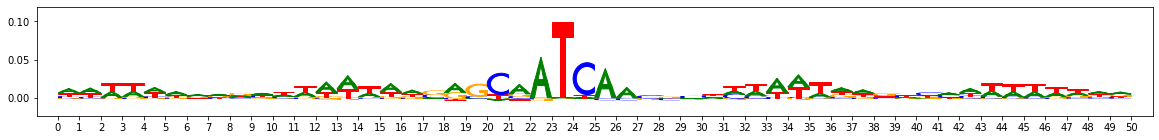

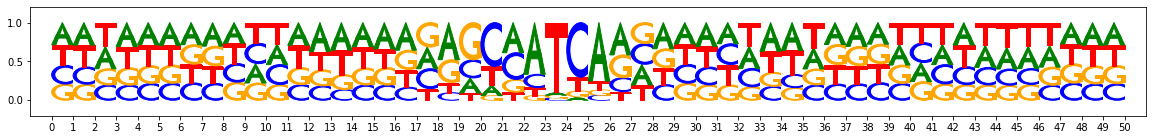

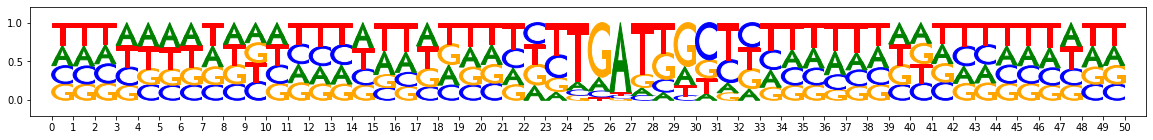

patternidx 1
num seqlets 1299


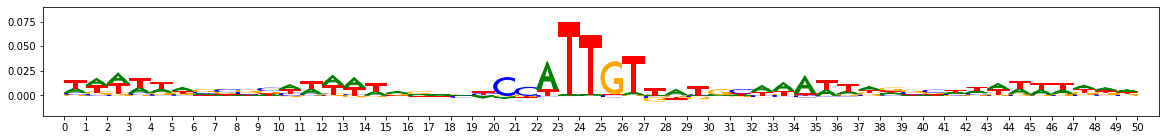

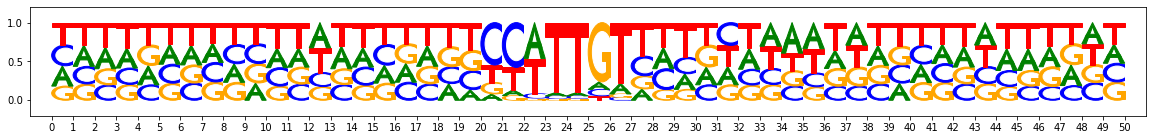

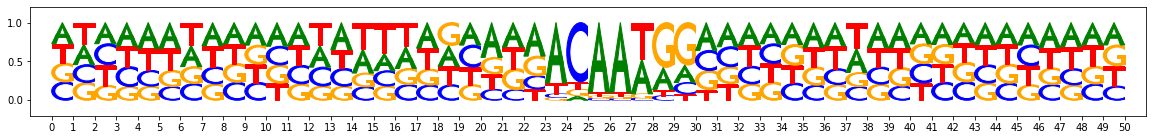

patternidx 2
num seqlets 928


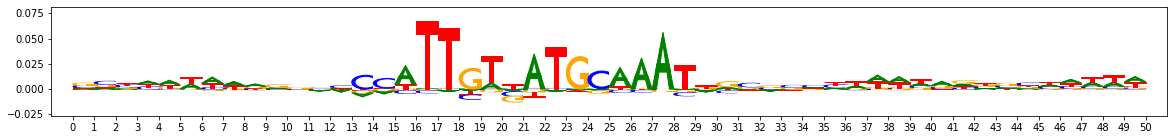

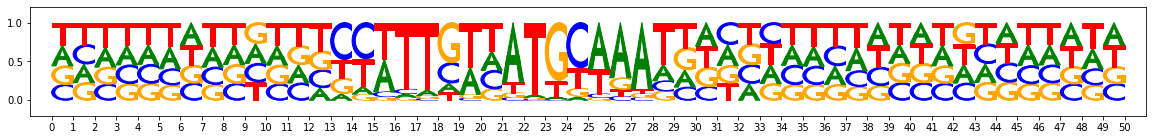

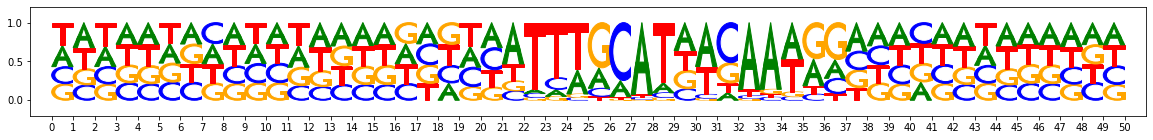

patternidx 3
num seqlets 470


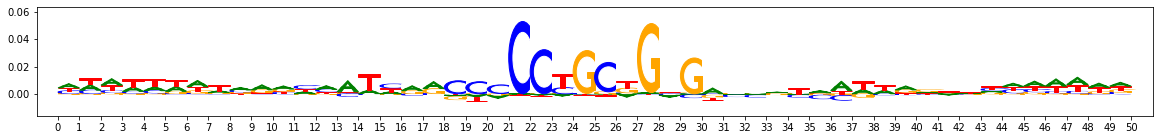

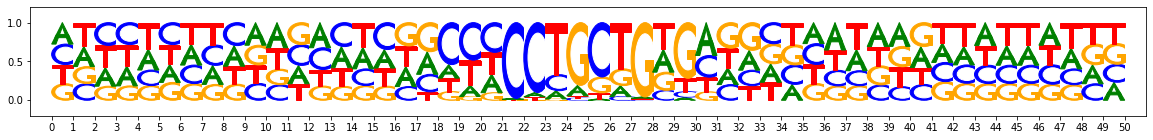

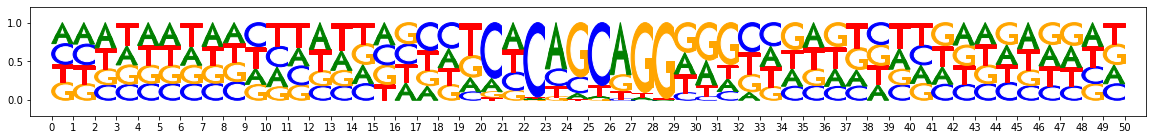

patternidx 4
num seqlets 405


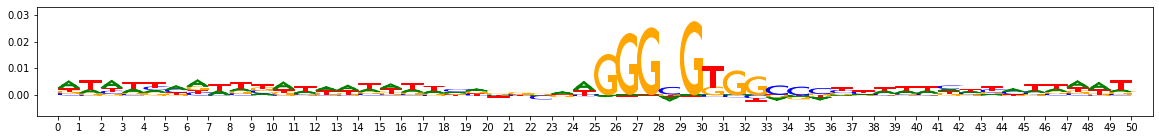

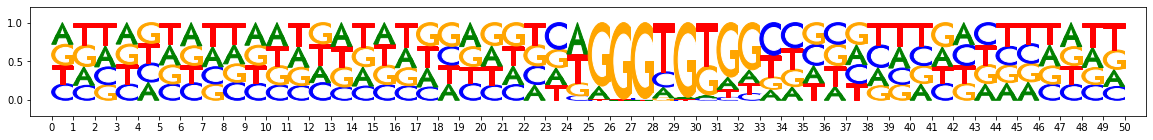

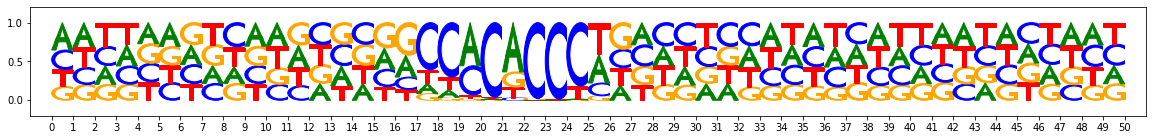

patternidx 5
num seqlets 242


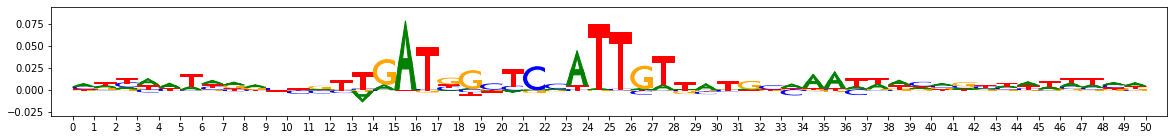

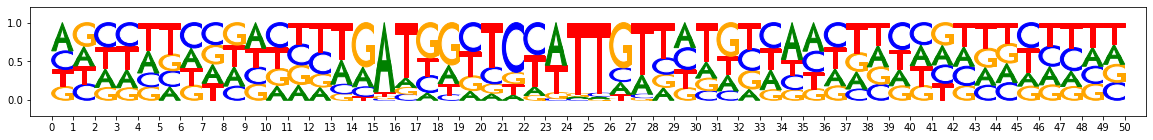

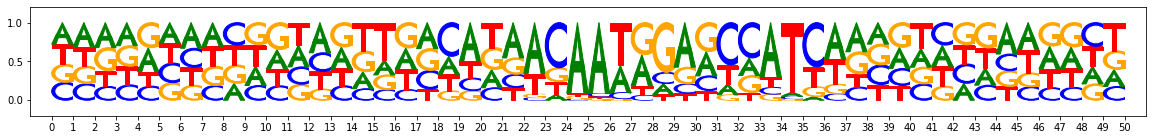

patternidx 6
num seqlets 193


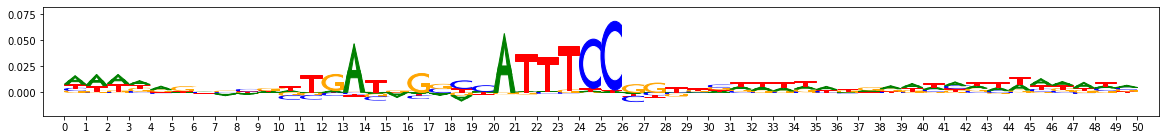

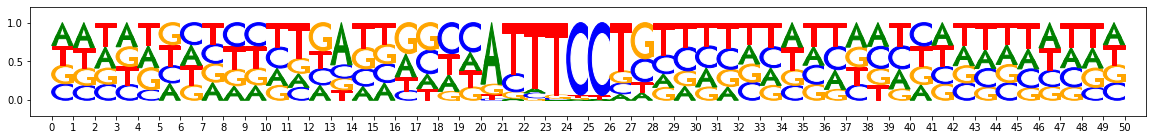

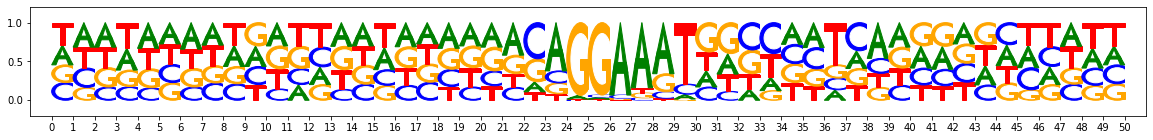

patternidx 7
num seqlets 125


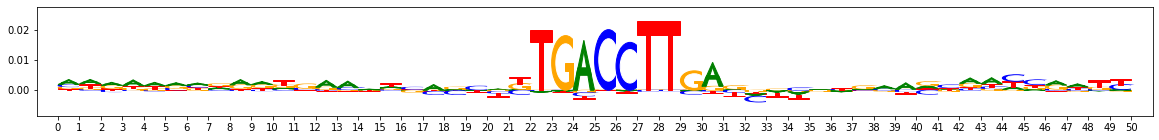

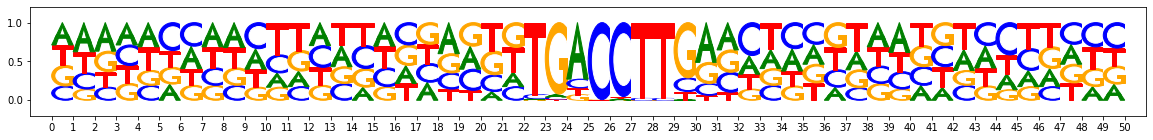

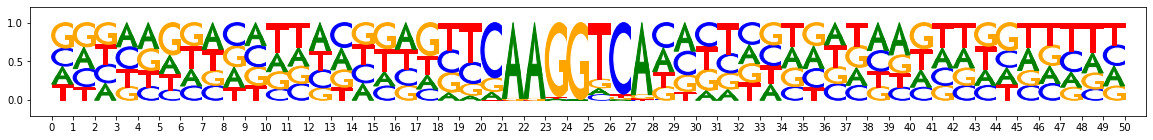

patternidx 8
num seqlets 90


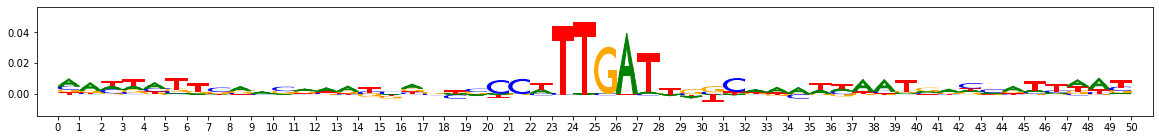

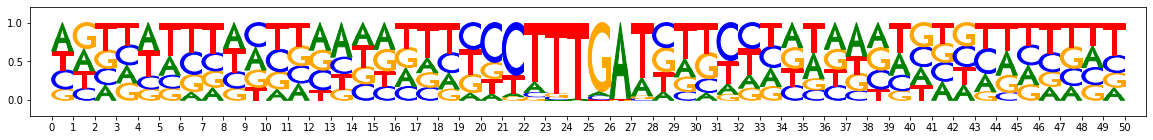

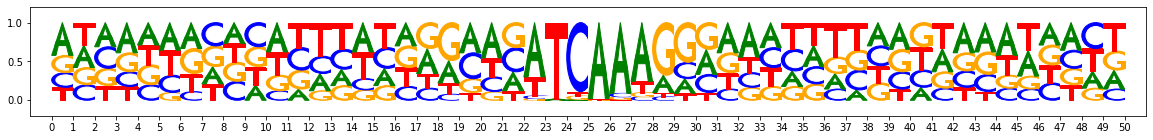

patternidx 9
num seqlets 48


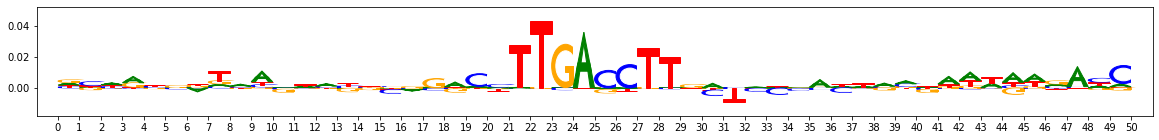

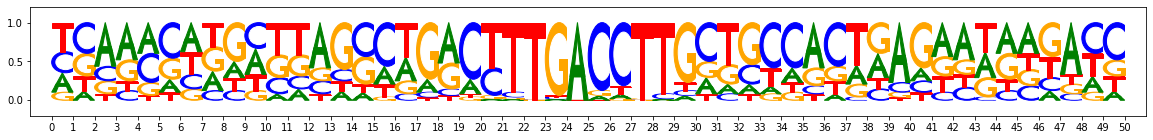

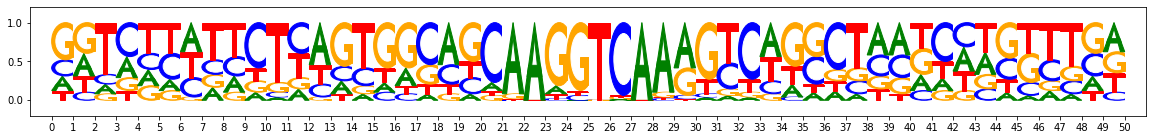

patternidx 10
num seqlets 41


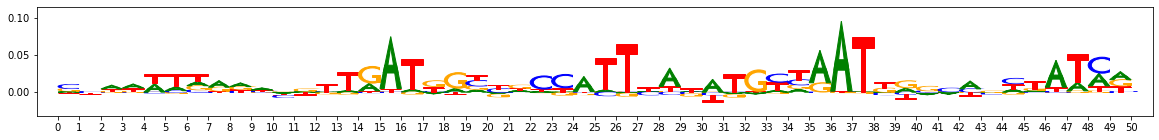

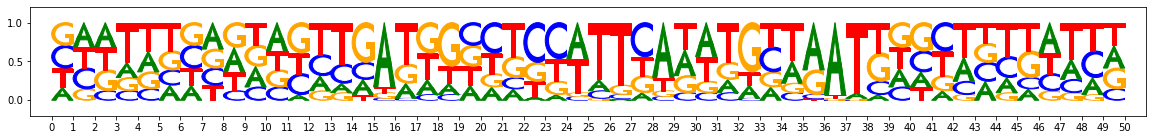

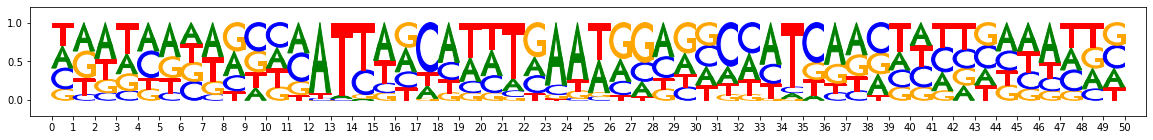

patternidx 11
num seqlets 34


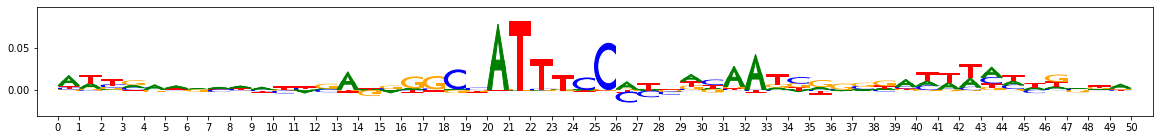

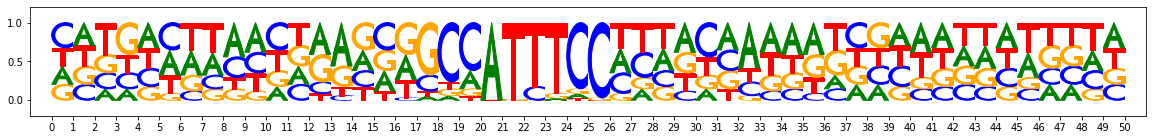

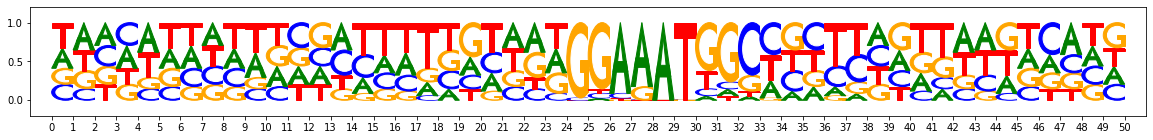

patternidx 12
num seqlets 30


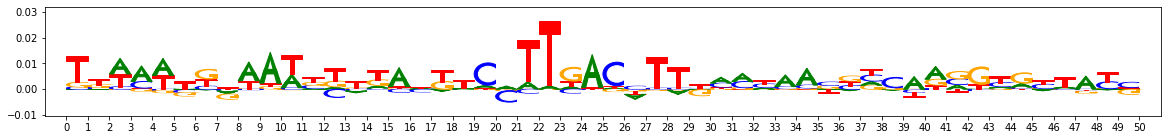

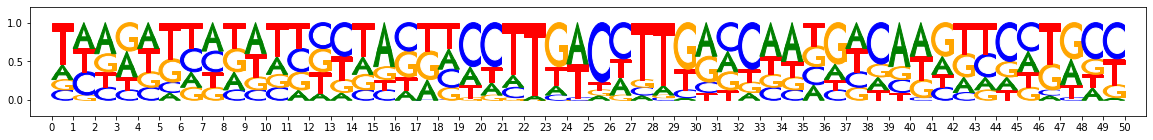

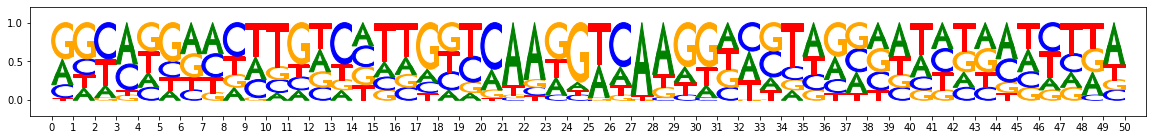

patternidx 13
num seqlets 27


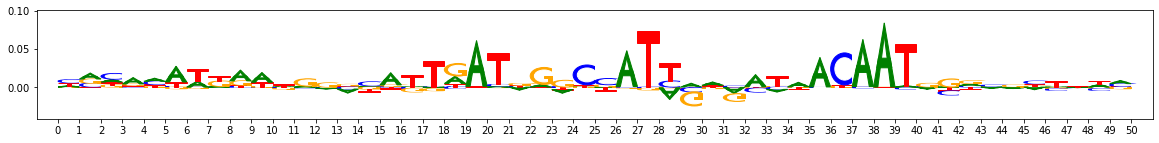

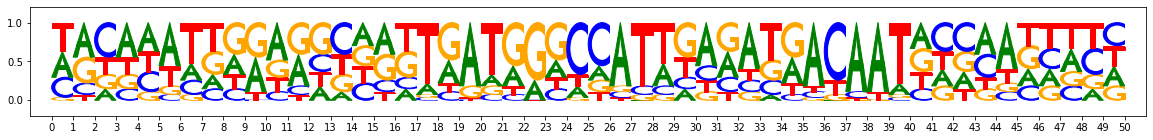

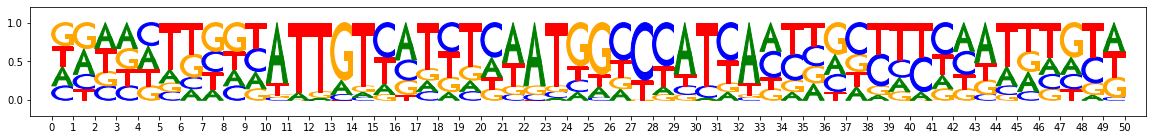

patternidx 14
num seqlets 26


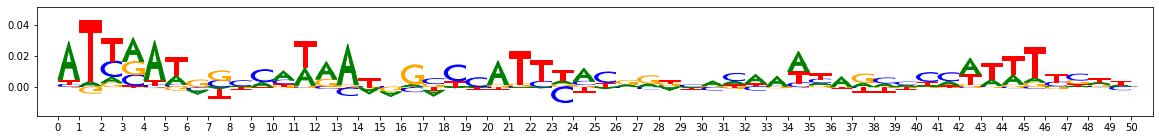

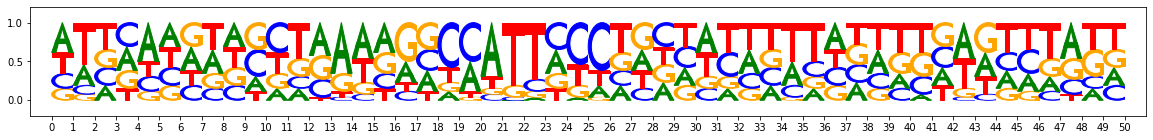

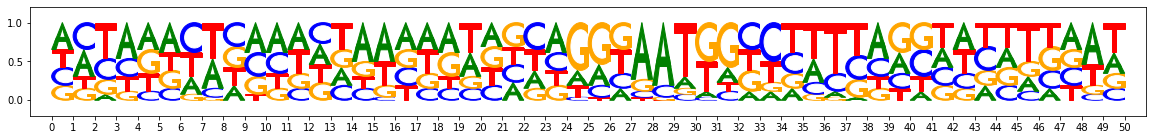

patternidx 15
num seqlets 24


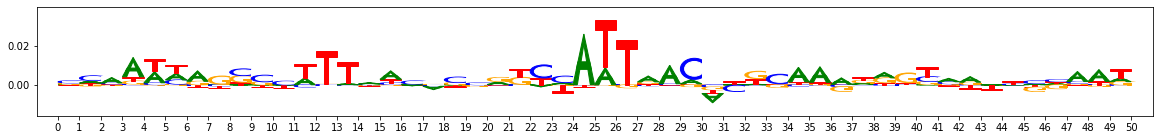

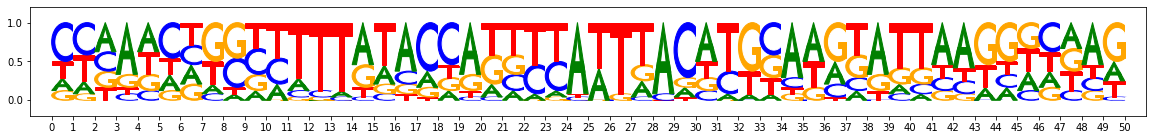

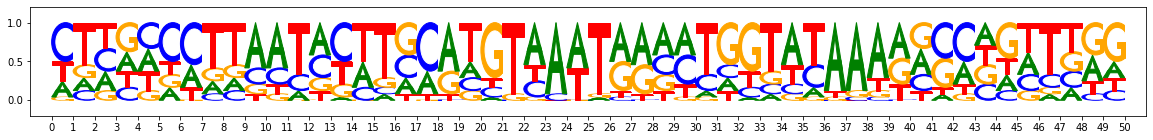

patternidx 16
num seqlets 19


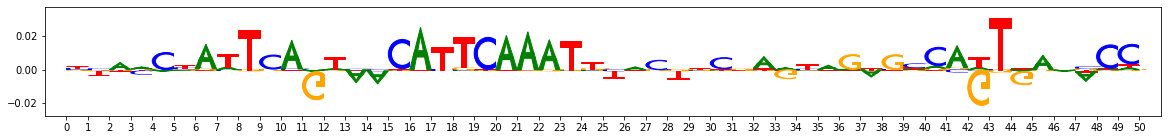

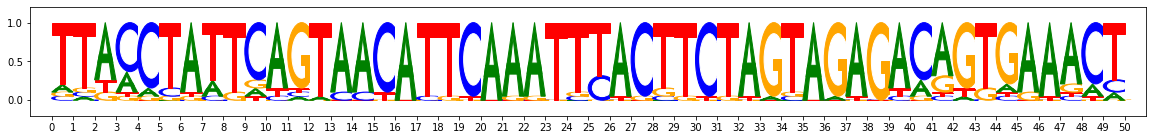

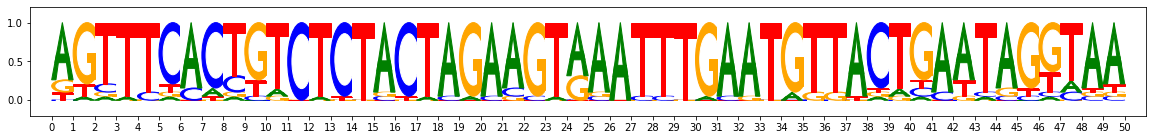

patternidx 17
num seqlets 9


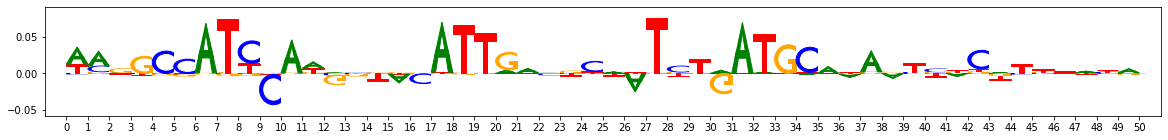

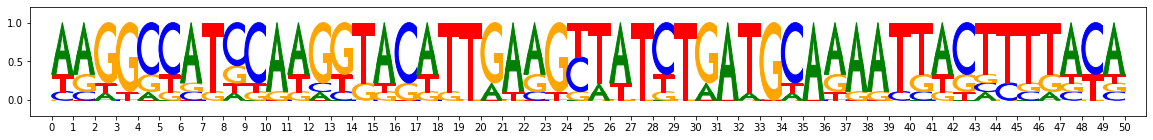

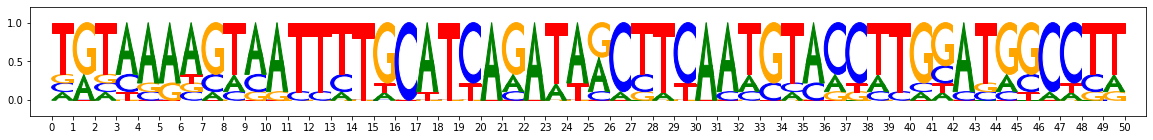

patternidx 18
num seqlets 3


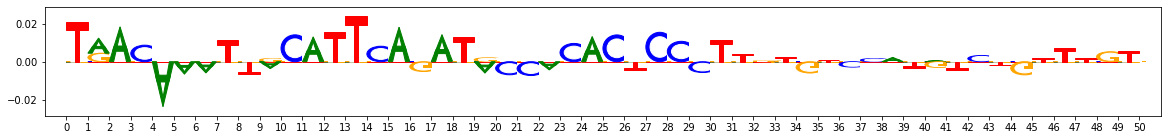

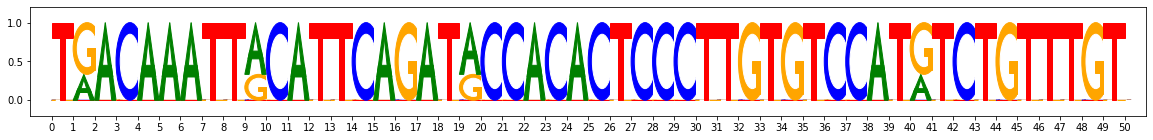

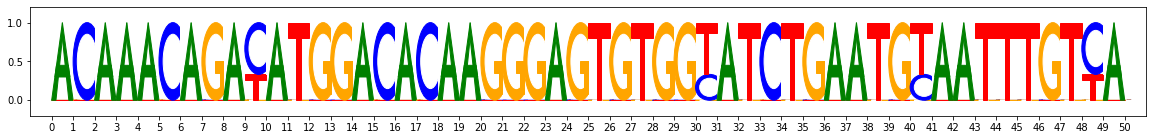

patternidx 19
num seqlets 1


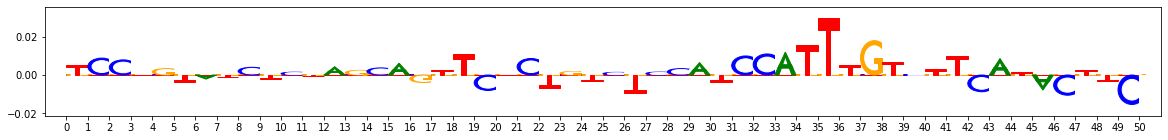

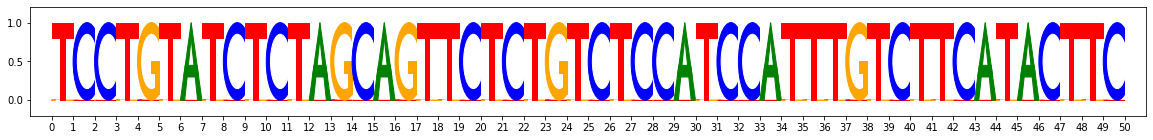

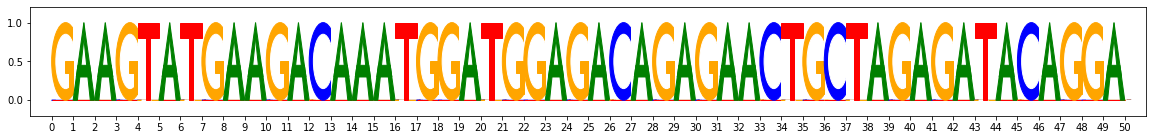

patternidx 20
num seqlets 1


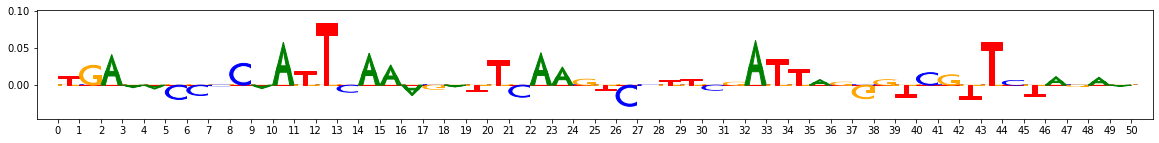

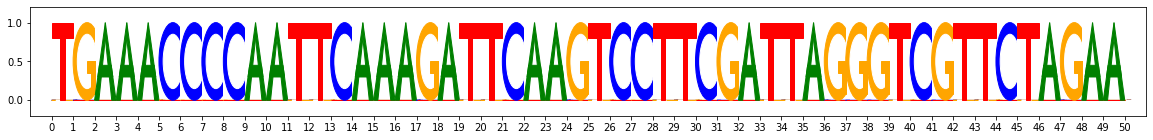

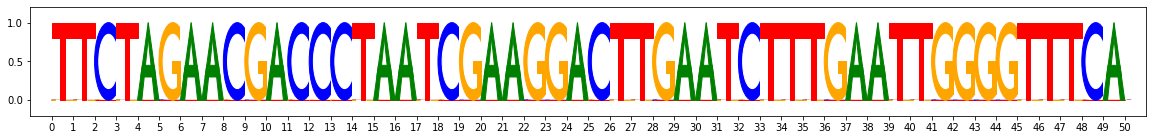

In [8]:
from modisco.visualization import viz_sequence

for idx,node in enumerate(results.metacluster_idx_to_submetacluster_results[0]
                          .seqlets_to_patterns_result.pattern_merge_hierarchy.root_nodes):
    print("patternidx",idx)
    pattern = node.pattern
    print("num seqlets",len(pattern.seqlets))
    viz_sequence.plot_weights(pattern["Nanog_profile_wn_contrib_scores"].fwd)
    viz_sequence.plot_weights(pattern["sequence"].fwd)
    viz_sequence.plot_weights(pattern["sequence"].rev)

In [ ]:
import h5py
import modisco.util
reload(modisco.util)
import os

file_path = "agkmfewerseqles_newclustermerging.h5"
if (os.path.exists(file_path)):
    os.remove(file_path)
grp = h5py.File(file_path, "w")
results.save_hdf5(grp)
grp.close()

In [ ]:
from modisco.visualization import viz_sequence
%matplotlib inline

hdf5_results = h5py.File(file_path,"r")

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []
background = np.array([0.27, 0.23, 0.23, 0.27])

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    print(len(all_pattern_names))
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["Nanog_profile_wn_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["Nanog_profile_wn_contrib_scores"]["fwd"])
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(np.array(pattern["sequence"]["fwd"])) 
        viz_sequence.plot_weights(np.array(pattern["sequence"]["rev"])) 
        
hdf5_results.close()

In [ ]:

track_set = modisco.tfmodisco_workflow.workflow.prep_track_set(
                task_names=["Nanog_profile_wn"],
                contrib_scores=contrib_scores,
                hypothetical_contribs=hypothetical_contribs,
                one_hot=one_hot)

grp = h5py.File("results.hdf5","r")
loaded_tfmodisco_results =\
    workflow.TfModiscoResults.from_hdf5(grp, track_set=track_set)
grp.close()

In [ ]:
def recursive_plot_hierarchy_motifs(nodes, path):
    for i in range(len(nodes)):
        nodepath = path+"/"+str(i)
        print("Path to node:",nodepath)
        print("Number of seqlets",len(nodes[i].pattern.seqlets))
        if (nodes[i].indices_merged is not None):
            print("indices merged:",nodes[i].indices_merged)
            print("submat crosscontam:\n",nodes[i].submat_crosscontam)
            print("submat alignersim:\n",nodes[i].submat_alignersim)
        viz_sequence.plot_weights(nodes[i].pattern["sequence"].fwd)
        viz_sequence.plot_weights(nodes[i].pattern["task0_contrib_scores"].fwd)
        viz_sequence.plot_weights(nodes[i].pattern["task0_hypothetical_contribs"].fwd)
        recursive_plot_hierarchy_motifs(nodes[i].child_nodes, path=nodepath)

pattern_merge_hierarchy = recursive_plot_hierarchy_motifs(loaded_tfmodisco_results
    .metacluster_idx_to_submetacluster_results["metacluster_0"]
    .seqlets_to_patterns_result.pattern_merge_hierarchy.root_nodes,
    path="root")